In [11]:
from numpy import ndarray, std, argsort
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, subplots, savefig, show
from sklearn.ensemble import GradientBoostingClassifier
from libs.ds_charts import plot_evaluation_results, multiple_line_chart, horizontal_bar_chart, HEIGHT, plot_overfitting_study
from sklearn.metrics import accuracy_score

<Figure size 600x450 with 0 Axes>

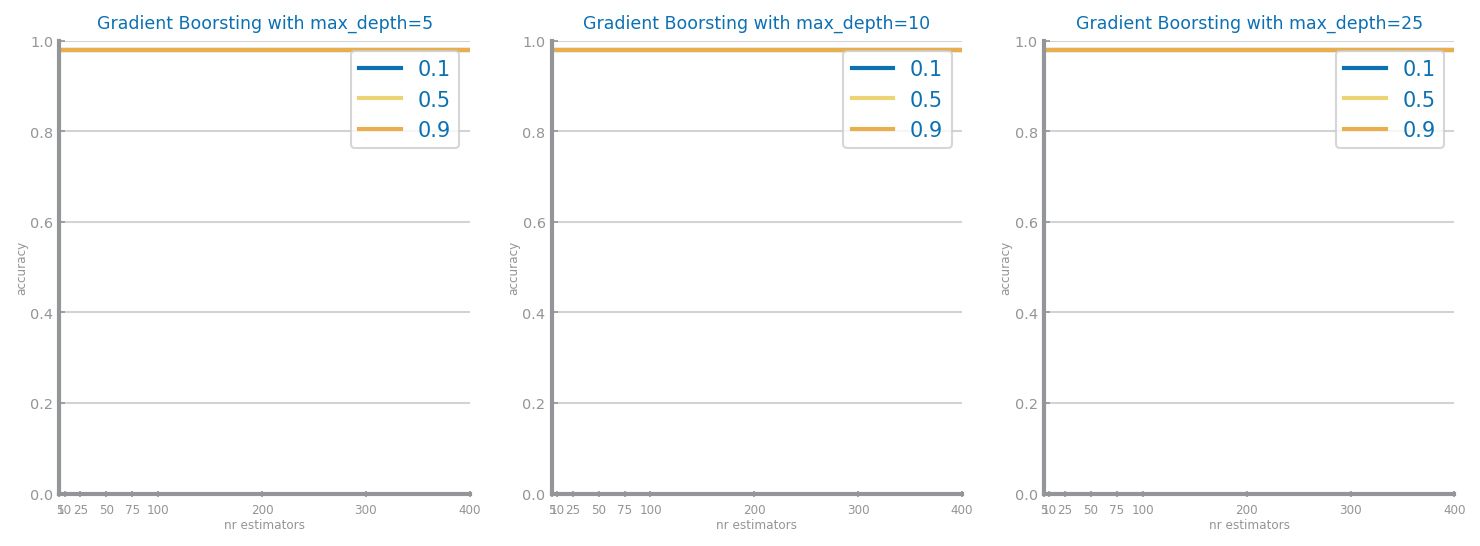

Best results with depth=5, learning rate=0.10 and 5 estimators, with accuracy=0.98


In [12]:
file_tag_zscore = 'air_quality_scaled_zscore'
filename_zscore = 'data/dataset_2/air_quality_scaled_zscore'
target = 'ALARM'

train: DataFrame = read_csv(f'{filename_zscore}_train_smote.csv')
train = train.sample(10000)
trnY: ndarray = train.pop(target).values
trnX: ndarray = train.values
labels = unique(trnY)
labels.sort()

test: DataFrame = read_csv(f'{filename_zscore}_test.csv')
test = test.sample(10000)
tstY: ndarray = test.pop(target).values
tstX: ndarray = test.values

n_estimators = [5, 10, 25, 50, 75, 100, 200, 300, 400]
max_depths = [5, 10, 25]
learning_rate = [.1, .5, .9]
best = ('', 0, 0)
last_best = 0
best_model = None

cols = len(max_depths)
figure()
fig, axs = subplots(1, cols, figsize=(cols*HEIGHT, HEIGHT), squeeze=False)
for k in range(len(max_depths)):
    d = max_depths[k]
    values = {}
    for lr in learning_rate:
        yvalues = []
        for n in n_estimators:
            gb = GradientBoostingClassifier(n_estimators=n, max_depth=d, learning_rate=lr)
            gb.fit(trnX, trnY)
            prdY = gb.predict(tstX)
            yvalues.append(accuracy_score(tstY, prdY))
            if yvalues[-1] > last_best:
                best = (d, lr, n)
                last_best = yvalues[-1]
                best_model = gb
        values[lr] = yvalues
    multiple_line_chart(n_estimators, values, ax=axs[0, k], title=f'Gradient Boosting with max_depth={d}',
                           xlabel='nr estimators', ylabel='accuracy', percentage=True)
savefig(f'lab7_images/dataset_2/{file_tag_zscore}_gb_study.png')
show()
print('Best results with depth=%d, learning rate=%1.2f and %d estimators, with accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

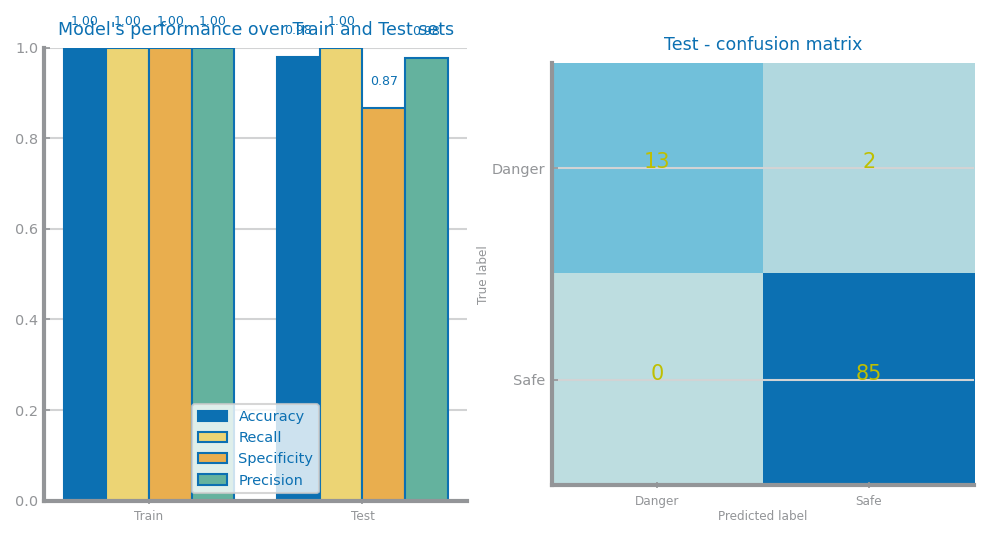

In [13]:
prd_trn = best_model.predict(trnX)
prd_tst = best_model.predict(tstX)
plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
savefig(f'lab7_images/dataset_2/{file_tag_zscore}_gb_best.png')
show()

1. feature PM10_Mean (0.8981410746116624)
2. feature PM2.5_Mean (0.10185892538833707)
3. feature O3_Std (3.961629527899801e-16)
4. feature O3_Max (1.4932792637764125e-16)
5. feature PM10_Max (0.0)
6. feature SO2_Mean (0.0)
7. feature SO2_Min (0.0)
8. feature SO2_Max (0.0)
9. feature SO2_Std (0.0)
10. feature Prov_EN_Anhui (0.0)
11. feature Prov_EN_Beijing (0.0)
12. feature Prov_EN_Chongqing (0.0)
13. feature Prov_EN_Fujian (0.0)
14. feature Prov_EN_Gansu (0.0)
15. feature Prov_EN_Guangdong (0.0)
16. feature Prov_EN_Guangxi (0.0)
17. feature Prov_EN_Guizhou (0.0)
18. feature PM10_Std (0.0)
19. feature date_12 (0.0)
20. feature PM10_Min (0.0)
21. feature Prov_EN_Hebei (0.0)
22. feature PM2.5_Std (0.0)
23. feature PM2.5_Max (0.0)
24. feature PM2.5_Min (0.0)
25. feature O3_Min (0.0)
26. feature NO2_Std (0.0)
27. feature NO2_Min (0.0)
28. feature NO2_Mean (0.0)
29. feature CO_Std (0.0)
30. feature CO_Max (0.0)
31. feature CO_Min (0.0)
32. feature CO_Mean (0.0)
33. feature date_11 (0.0)
34. 

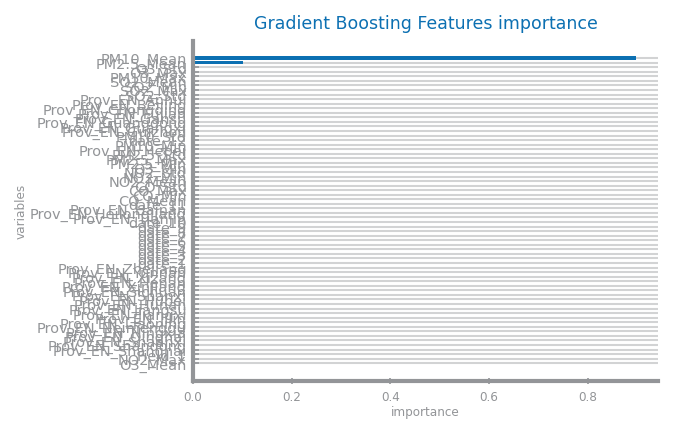

In [14]:
variables = train.columns
importances = best_model.feature_importances_
indices = argsort(importances)[::-1]
stdevs = std([tree[0].feature_importances_ for tree in best_model.estimators_], axis=0)
elems = []
for f in range(len(variables)):
    elems += [variables[indices[f]]]
    print(f'{f+1}. feature {elems[f]} ({importances[indices[f]]})')

figure()
horizontal_bar_chart(elems, importances[indices], stdevs[indices], title='Gradient Boosting Features importance', xlabel='importance', ylabel='variables')
savefig(f'lab7_images/dataset_2/{file_tag_zscore}_gb_ranking.png')

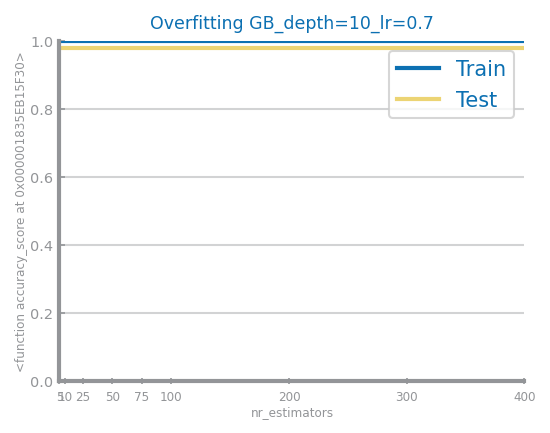

In [15]:
lr = 0.7
max_depth = 10
eval_metric = accuracy_score
y_tst_values = []
y_trn_values = []
for n in n_estimators:
    gb = GradientBoostingClassifier(n_estimators=n, max_depth=d, learning_rate=lr)
    gb.fit(trnX, trnY)
    prd_tst_Y = gb.predict(tstX)
    prd_trn_Y = gb.predict(trnX)
    y_tst_values.append(eval_metric(tstY, prd_tst_Y))
    y_trn_values.append(eval_metric(trnY, prd_trn_Y))
plot_overfitting_study(n_estimators, y_trn_values, y_tst_values, name=f'GB_depth={max_depth}_lr={lr}', xlabel='nr_estimators', ylabel=str(eval_metric))